# This notebook is to evaluate different networks

# Table of contents
## <a href='#Evaluation-1:-Evaluate-the-whole-network-with-different-communities-by-changing-community-detection-parameters'>1. Evaluate whole network with different communities</a>
### <a href='#Evaluation-1.1:-how-do-#-genes-change-in-each-community-when-community-assingment-changes?'>1.1 How do # genes change in each community?</a>
### <a href='#Evaluation-1.2:-how-does-network-cluster-stability-change-when-community-assingment-changes?'>1.2 How do network cluster stability change?</a>
### <a href='#Evaluation-1.3:-how-do-%-DE-in-each-community-change-when-community-assingment-changes?'>1.3 How do % DE in each community change?</a>
### <a href='#Evaluation-1.4:-how-do-%-of-significant-genes-change-when-community-assingment-changes-(This-process-takes->10-min-to-run)'>1.4 How do significant gene % change with different community assignment</a>
### <a href='#Evaluation-1.5:-how-do-trait-and-community-correlation-change-when-community-assignment-change'>1.5 How do trait and community correlation change with different community assignment</a>
## <a href='#Evaluation-2:-Evaluate-subnetwork-quality-by-comparing-to-the-whole-network'>2. Evaluate subnetwork by comparing to the whole network</a>
### <a href='#Evaluation-2.1:-does-the-scale-free-network-assumption-still-hold-in-the-subnetwork?'>2.1 Does scale-free assumption still hold in the subnetwork</a>
### <a href='#Evaluation-2.2:-compare-network-distance-by-GED-and-deltacon'>2.2 Compare distance between networks</a>
## <a href='#Evaluation-3:-compare-subnetworks-by-their-communities'>3. Compare subnetwork communities</a>
### <a href='#Evaluation-3.1:-compare-subnetwork-similarities'>3.1 Compare communities of the subnetwork</a>
### <a href='#Evaluation-3.2:-how-do-the-subnetwork-communities-compare-to-the-whole-network-in-terms-of-correlation-with-the-alcohol-phenotypes?'> 3.2 How do the communities compare between whole and subnetworks functionally?</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import netcomp
from itertools import combinations
from sklearn.metrics import normalized_mutual_info_score as nmi
from matplotlib import gridspec
from functions.eda_functions import *
from functions.subset_network import subset_network
from functions.process_phenotype import *
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [15]:
tom_df = pd.read_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\Kapoor_TOM.csv', index_col = 0)
# tom_df = pd.read_csv('/Volumes/GoogleDrive/Shared drives/NIAAA_ASSIST/Data/Kapoor_TOM.csv', index_col = 0)

In [161]:
# joining metadata and expression data 
meta = pd.read_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\kapoor2019_coga.inia.detailed.pheno.04.12.17.csv')

In [4]:
expression = pd.read_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\kapoor2019_batch.age.rin.sex.pm.alc.corrected.coga.inia.expression.txt', sep = '\t')

In [3]:
network_IDs = pd.read_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\network_IDs.csv', index_col = 0)

In [9]:
# get the expression only for genes present in the network
expression = expression[expression.id.isin(network_IDs['0'])]

In [10]:
# save expression df that contained only genes present in the network and use it for module detection in WGCNA
expression.to_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\network_only_expression.csv', index = 0)

In [158]:
expression_t = expression.T 

In [7]:
# preprocessing to join with metadata
expression_t = expression.T 
expression_t.columns = expression_t.iloc[0,:]
expression_t.drop('id', inplace=True)

In [180]:
expression_meta = pd.merge(expression_t, meta, left_index = True, right_on = 'IID')

In [182]:
expression_meta.to_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\expression_meta.csv', index = 0)

# Evaluation 1: Evaluate the whole network with different communities by changing community detection parameters

In [ ]:
## read in the WCGNA modules as the baseline with 1 setting only

In [13]:
wgcna_modules = pd.read_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\wcgna_modules.csv')

In [10]:
# rename the columns, although wgcna used hclust, I renamed it as louvain so could compare with other louvain clusters
# wgcna_modules.rename(columns = {'Unnamed: 0':'id', 'x':'louvain_label'}, inplace = True)

In [12]:
# wgcna_modules.to_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\wcgna_modules.csv', index = 0)

In [16]:
# test with 2 sets of parameters (change resolution only)
comm_df1 = run_louvain(tom_df, 1, -1) # default setting
comm_df2 = run_louvain(tom_df, 1, 1)

In [30]:
comm_df1.to_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\network_louvain_default.csv', index = 0)

In [6]:
# comm_df1 = pd.read_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\network_louvain_default.csv', index_col = 0)

## Evaluation 1.1: how do # genes change in each community when community assingment changes?

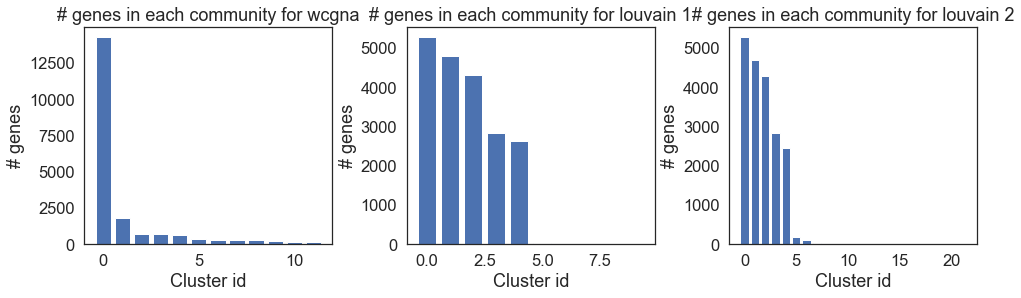

In [293]:
comm_dfs = [wgcna_modules,comm_df1, comm_df2]
comm_names = ['wcgna','louvain 1', 'louvain 2']
plot_gene_cnt_each_cluster(comm_dfs, 'louvain_label', comm_names)

## Evaluation 1.2: how does network cluster stability change when community assingment changes?

In [ ]:
cluster_pair_wcgna_n_com1, network_cluster_stability1 = network_cluster_stability(wgcna_modules, comm_df1, 'louvain_label')

### The histogram shows distribution for z scores for p value or correlation coefficient if the cluster membership is randomly assigned. The red vertical line is where the actual Z score is. For p value, the red line should be as left as possible for small p values for the actual cluster. For correlation coefficient, the red line should be either very left or very right to be very negatively correlated or very positively correlated for the actual cluster.

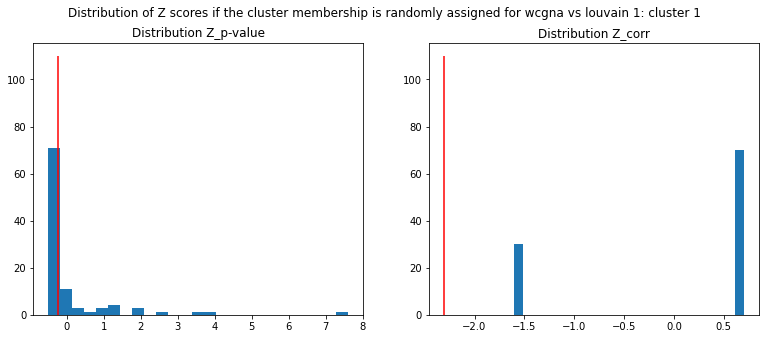

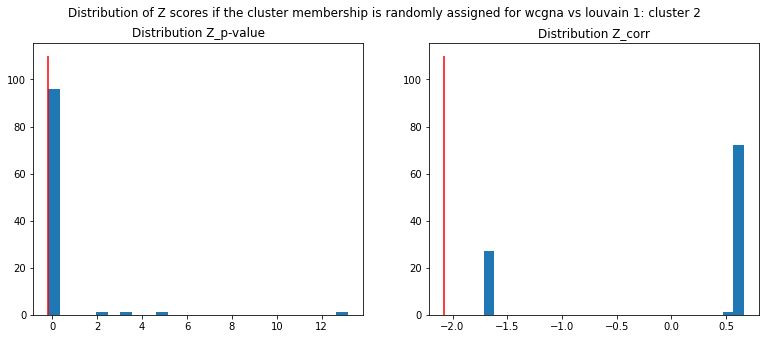

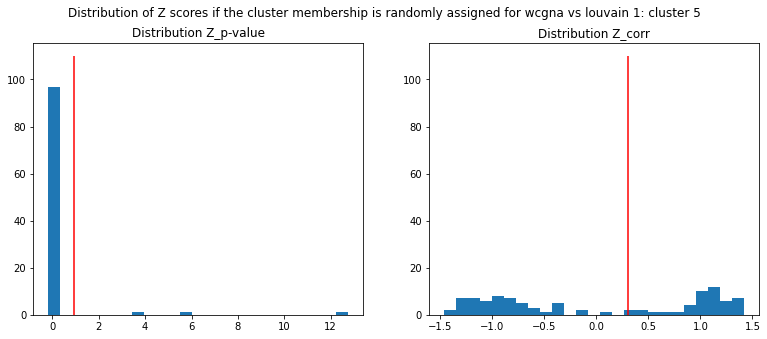

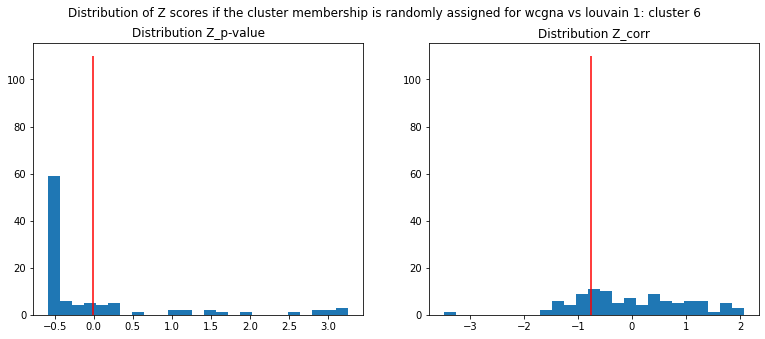

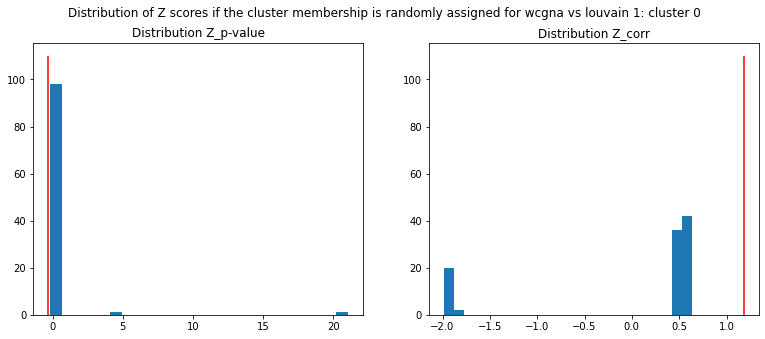

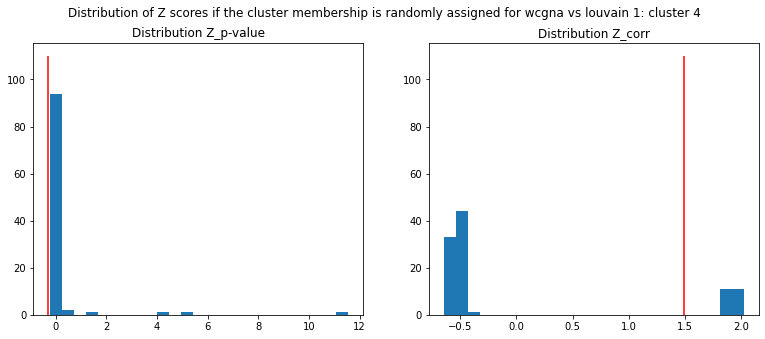

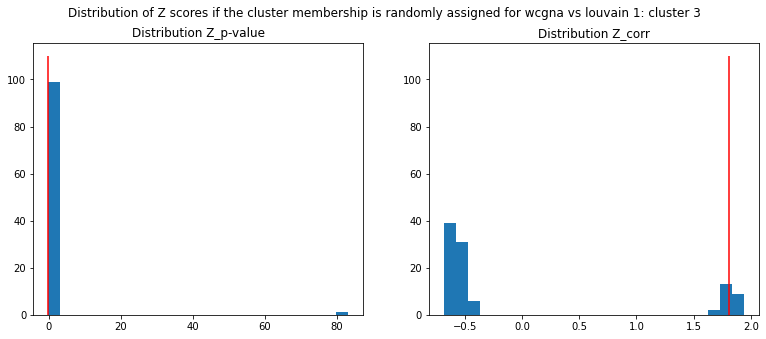

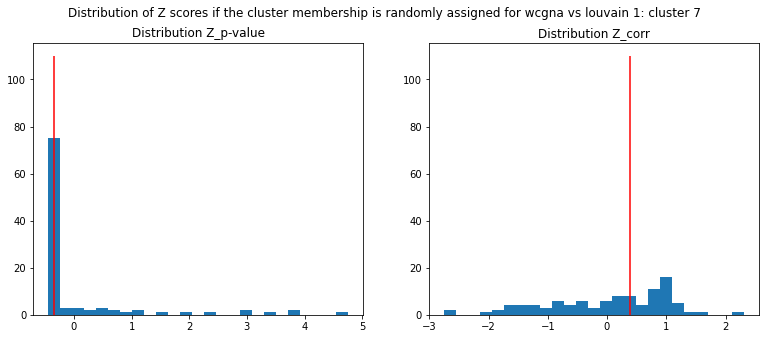

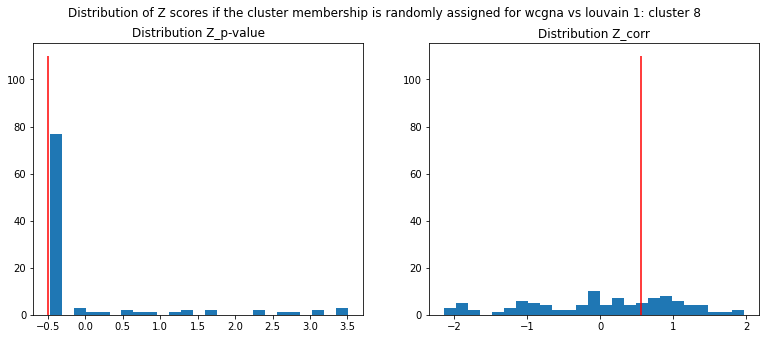

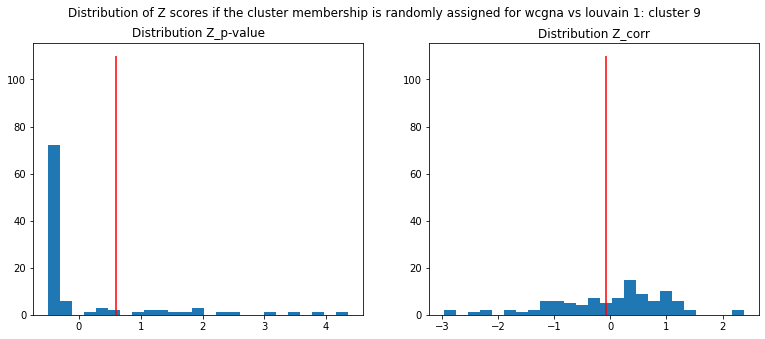

In [18]:
for cluster in comm_df1.louvain_label.unique():
    plot_random_vs_actual_z(wgcna_modules, comm_df1, cluster_pair_wcgna_n_com1[cluster], cluster, 'louvain_label', network_cluster_stability1, 'wcgna vs louvain 1')

## Evaluation 1.3: how do % DE in each community change when community assingment changes?

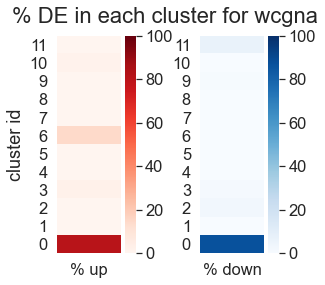

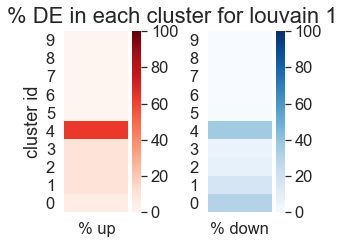

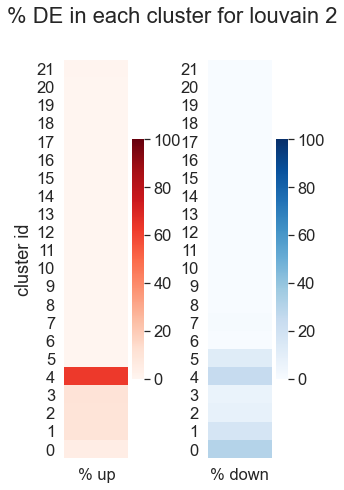

In [294]:
for i, cluster_df in enumerate(comm_dfs):
    cluster_DE_perc(cluster_df, 'louvain_label', comm_names[i])

## Evaluation 1.4: how do % of significant genes change when community assingment changes (This process takes >10 min to run)

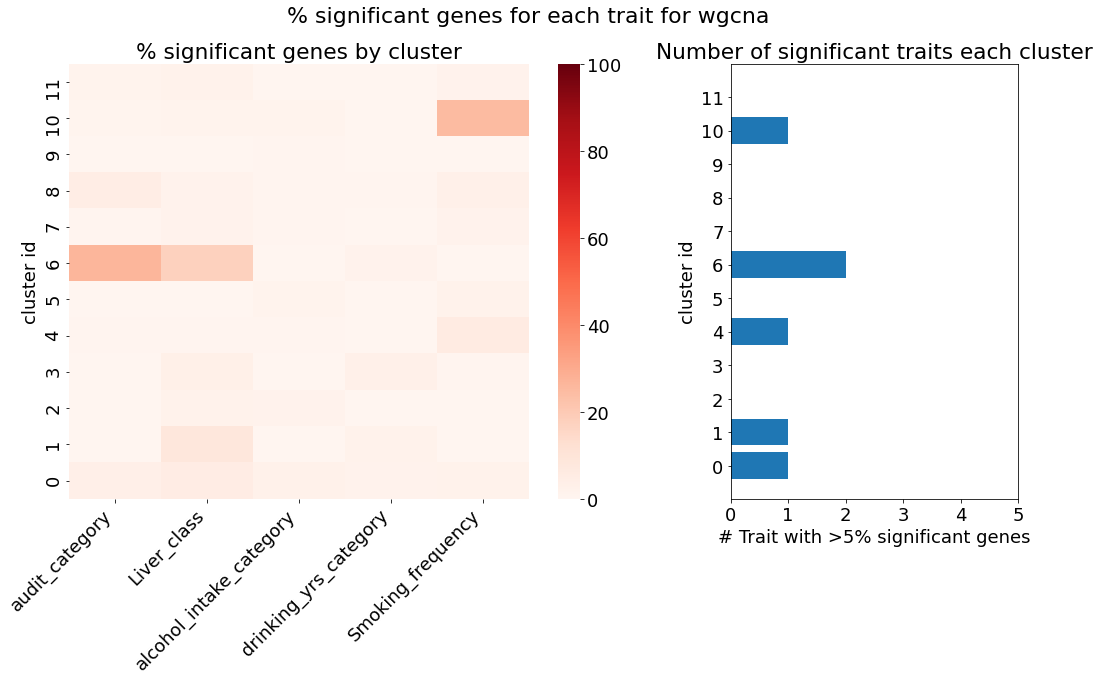

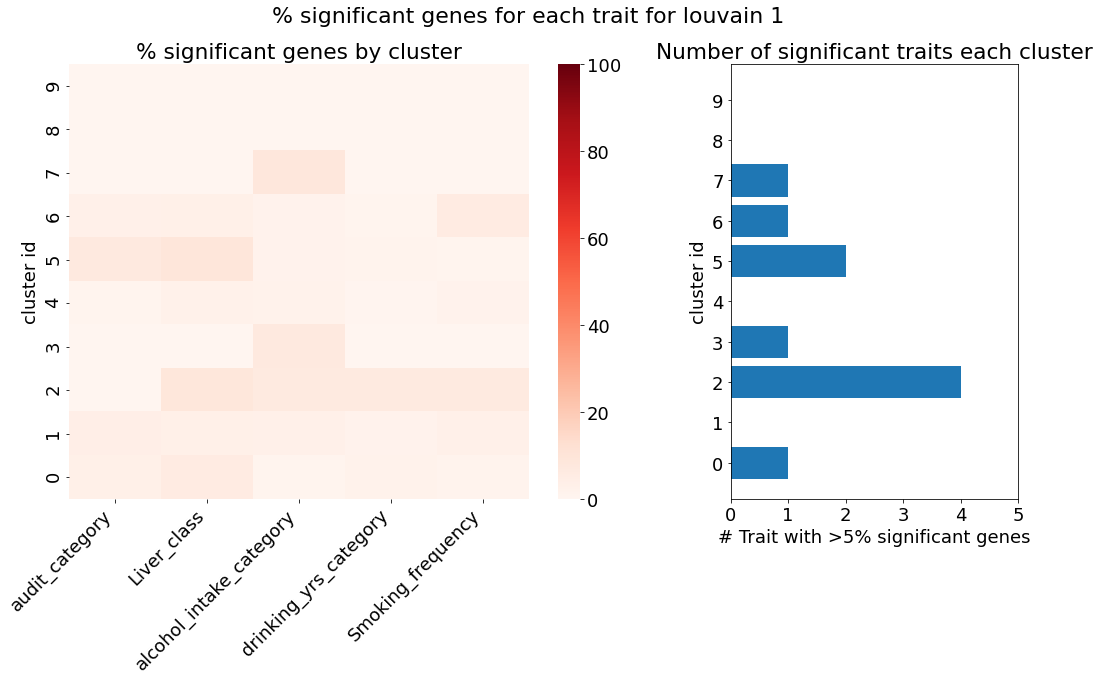

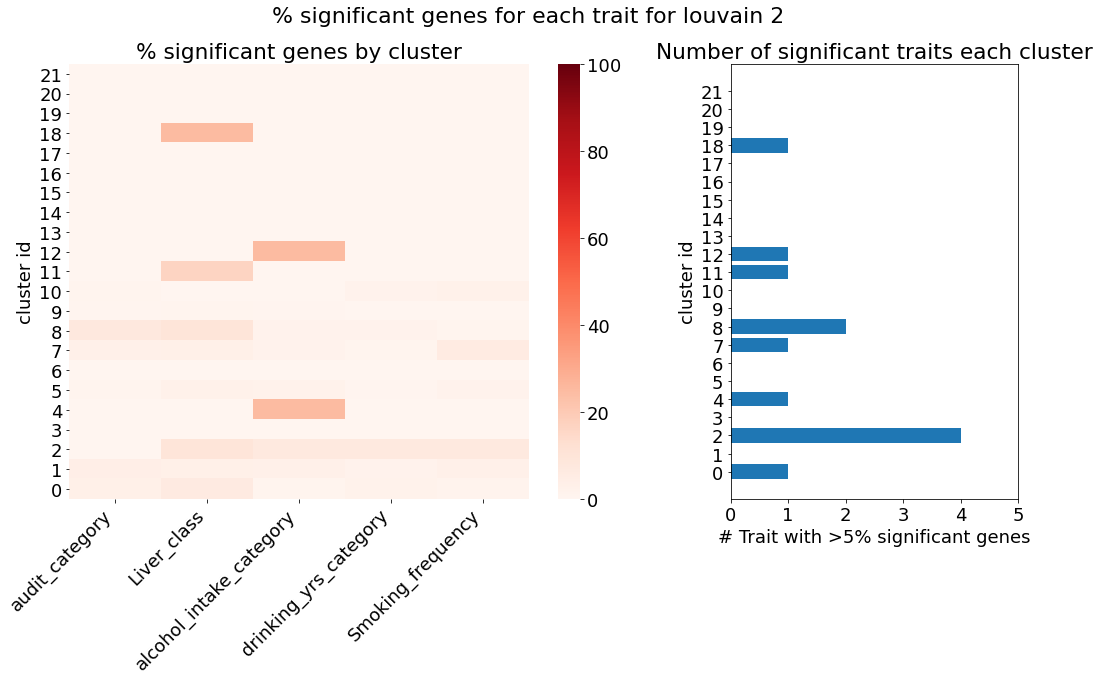

In [220]:
cluster_df_names = ['wgcna','louvain 1', 'louvain 2']
for i, cluster_df in enumerate([wgcna_modules,comm_df1, comm_df2]):
    plot_sig_perc(cluster_df, 'louvain_label', cluster_df_names[i])

## Evaluation 1.5: how do trait and community correlation change when community assignment change

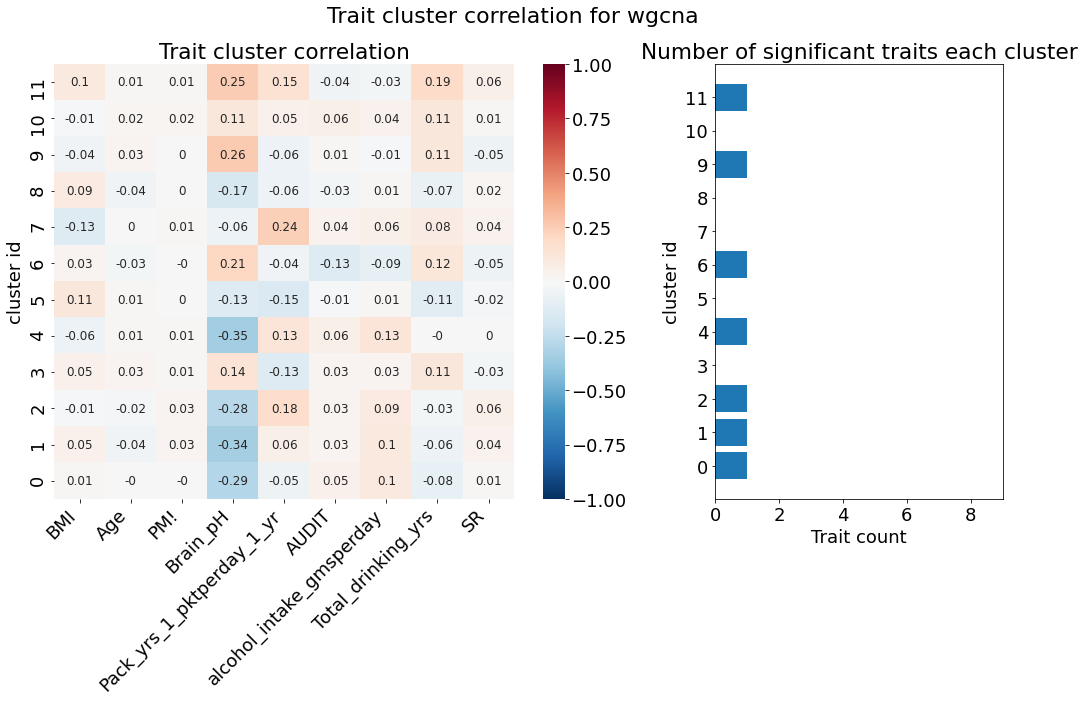

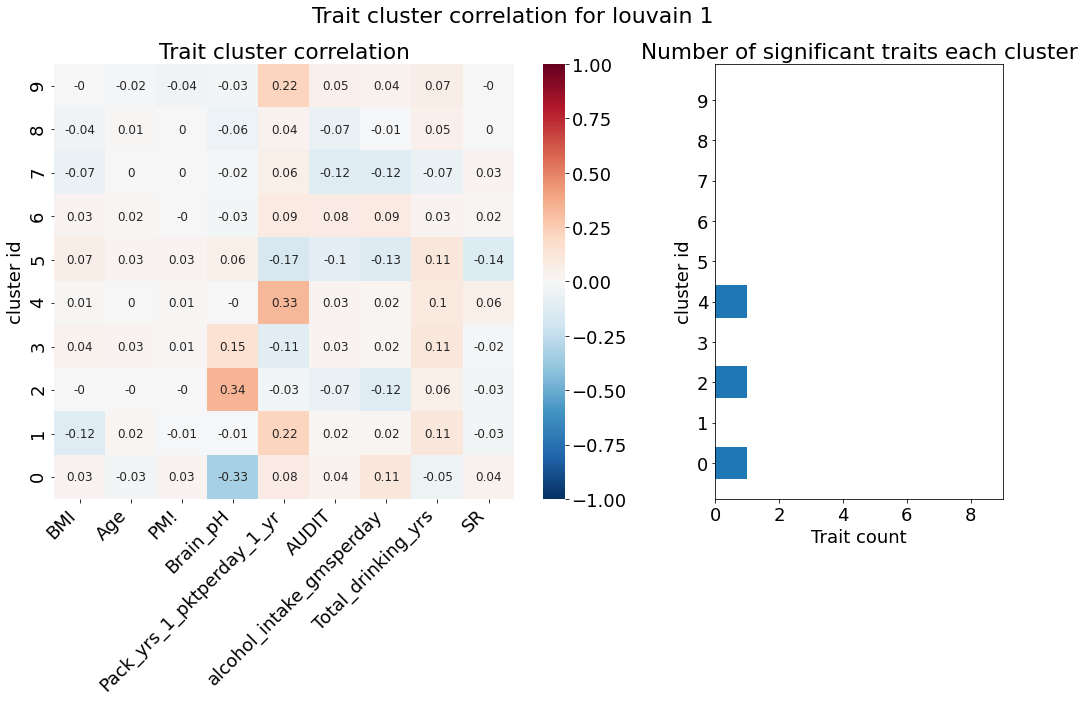

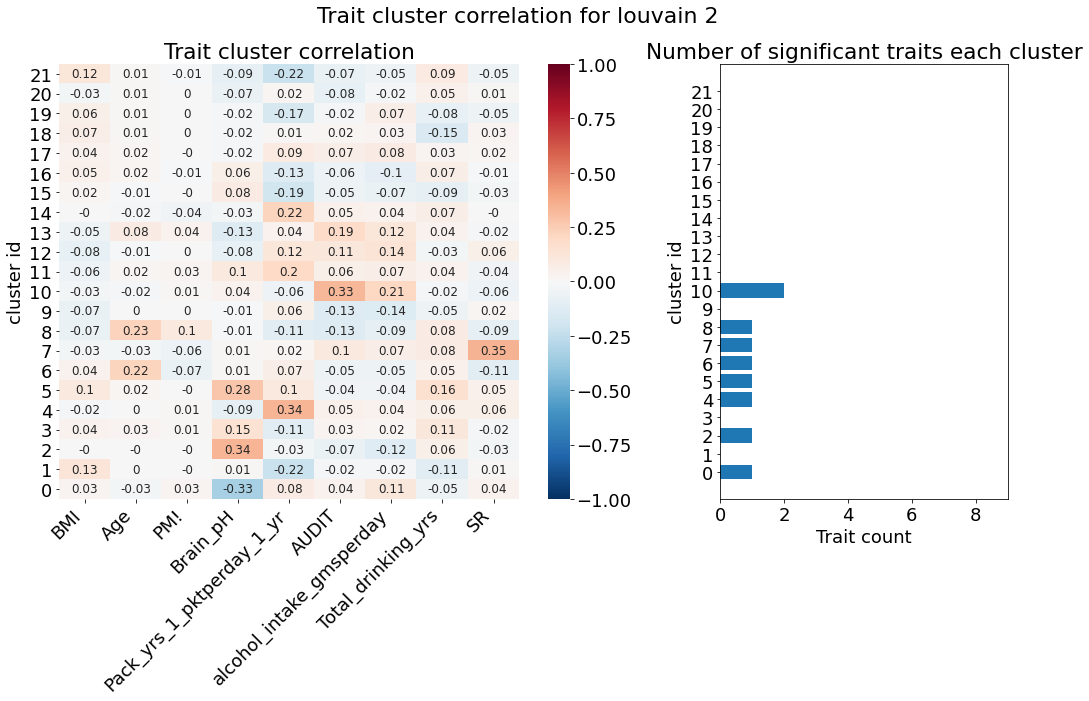

In [155]:
cluster_df_names = ['wgcna','louvain 1', 'louvain 2']
for i, cluster_df in enumerate([wgcna_modules,comm_df1, comm_df2]):
    cluster_phenotype_corr(cluster_df, 'louvain_label', cluster_df_names[i])

# Evaluation 2: Evaluate subnetwork quality by comparing to the whole network

In [41]:
tom_df_subset.to_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\tom_subset.csv')

## Evaluation 2.1: does the scale-free network assumption still hold in the subnetwork?

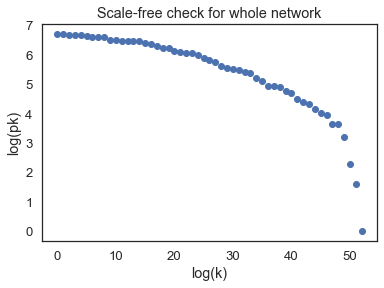

In [263]:
# Original network with no cutoff
scale_free_validate(tom_df, 'whole network')

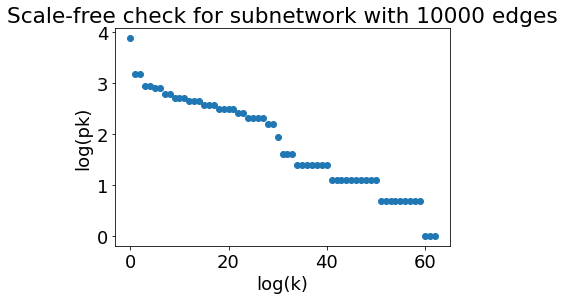

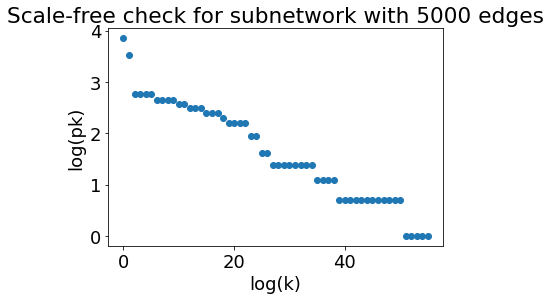

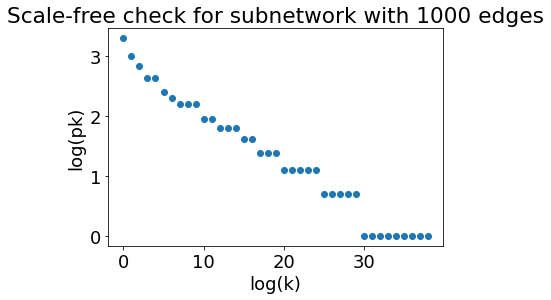

In [148]:
subset_networks = []
for edge in [10000,5000,1000]:
    subset, G = subset_network(tom_df, 0.21, 0.99, edge)
    subset_networks.append(subset) 
    scale_free_validate(subset, f'subnetwork with {edge} edges')

## Evaluation 2.2: compare network distance by GED and deltacon

### Note to use DeltaCon, the graphs need to have the same number of nodes so use subnetwork without removing the nodes with degree = 0

In [146]:
subset_networks2 = []
subset_G = []
for weight in [0.218, 0.24, 0.278]:
    subset, G = subset_network(tom_df, weight, 0.98)
    subset_networks2.append(subset)
    subset_G.append(G)

Number of edges left: 10100.0
Number of edges left: 4967.0
Number of edges left: 1092.0


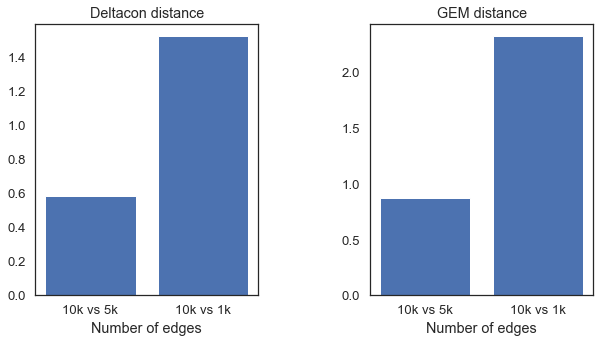

In [370]:
plot_graph_distance(subset_df, ['10k', '5k', '1k'])

# Evaluation 3: compare subnetworks by their communities

## Evaluation 3.1: compare subnetwork similarities

### Evaluation 3.1a: comparison by jaccard

In [149]:
subset_communities = []
for subset in subset_networks:
    subset_communities.append(run_louvain(subset))

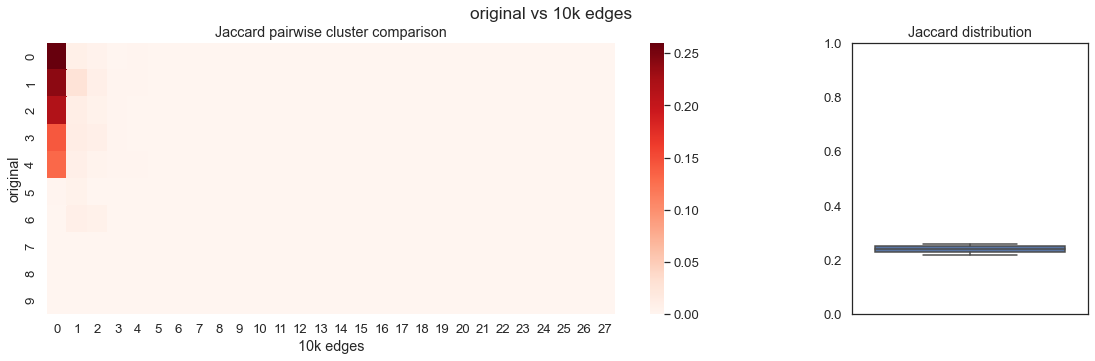

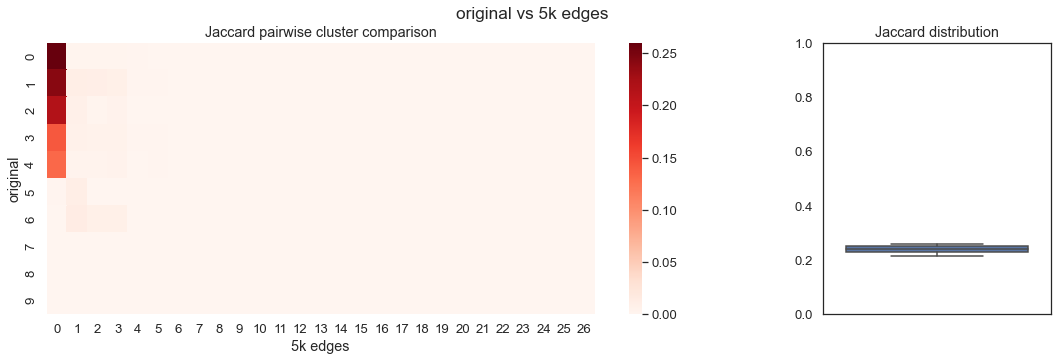

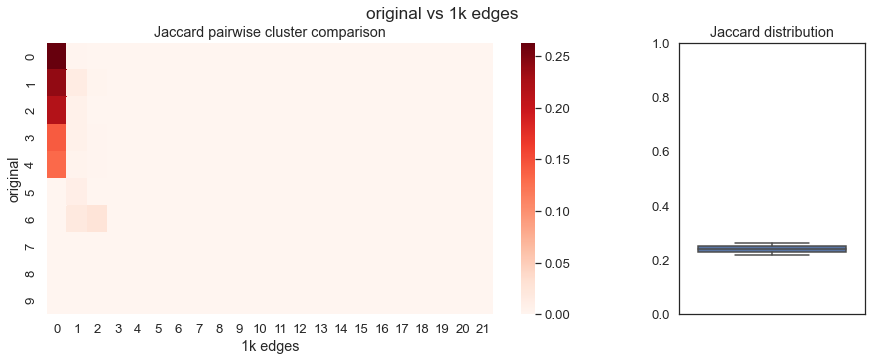

In [246]:
subset_names = ['10k edges', '5k edges', '1k edges']
for i, subset_com in enumerate(subset_communities):
    cluster_jaccard(comm_df1, subset_com, 'louvain_label', ['original', subset_names[i]], cutout_nodes = False, top=3)

### Evaluation 3.1b: comparison by jaccard (nodes with degree = 0 excluded)

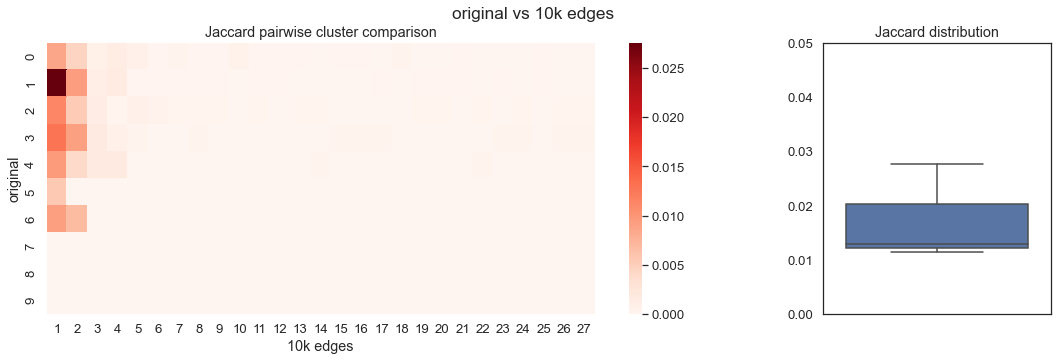

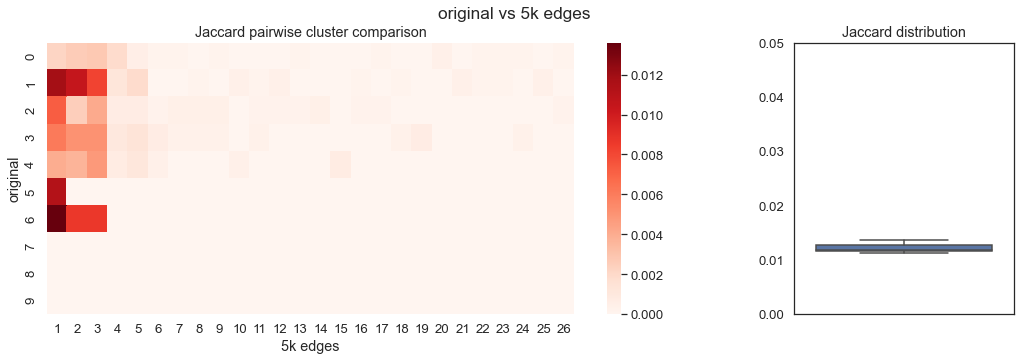

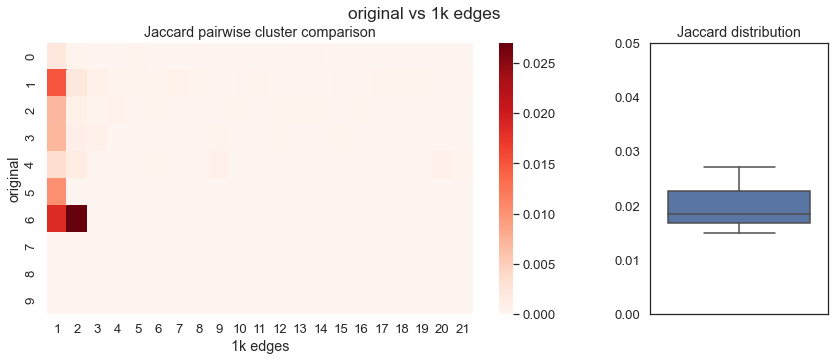

In [248]:
for i, subset_com in enumerate(subset_communities):
    cluster_jaccard(comm_df1, subset_com, 'louvain_label', ['original', subset_names[i]], cutout_nodes = True, top=3, y_max = 0.05)

### Evaluation 3.1c: comparison of subnetwork by normalized mutual information

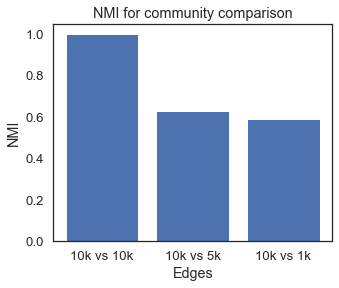

In [249]:
plot_cluster_nmi_comparison(subset_communities[0], subset_communities, 
                            'louvain_label', ['10k vs 10k', '10k vs 5k', '10k vs 1k'])

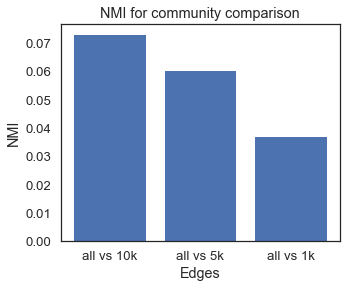

In [250]:
plot_cluster_nmi_comparison(comm_df1, subset_communities, 
                            'louvain_label', ['all vs 10k', 'all vs 5k', 'all vs 1k'])

## Evaluation 3.2: how do the subnetwork communities compare to the whole network in terms of correlation with the alcohol phenotypes?

### Evaluation 3.2a: compare whole network and subnetwork communities by % DE in each community

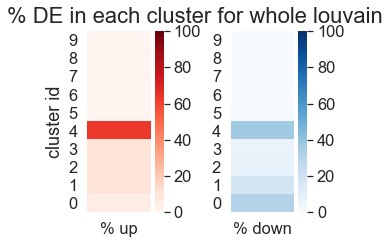

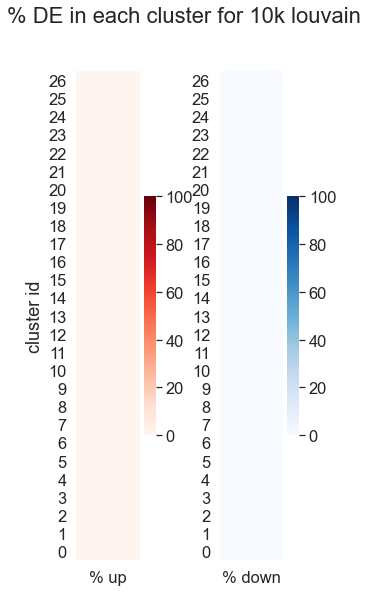

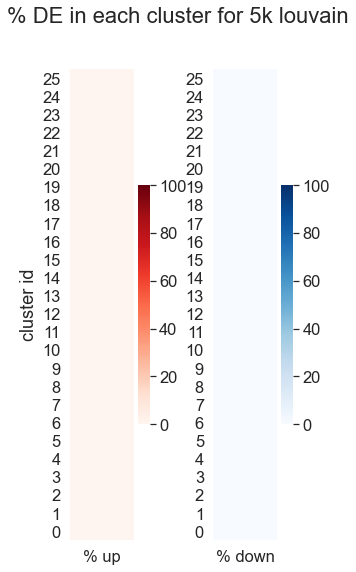

In [295]:
subset_names = ['whole louvain','10k louvain','5k louvain']
for i, cluster_df in enumerate([comm_df1, subset_communities[0], subset_communities[1]]):
    cluster_DE_perc(cluster_df, 'louvain_label', subset_names[i])

### Evaluation 3.2b: compare whole network and subnetwork communities by % significant genes in each cluster

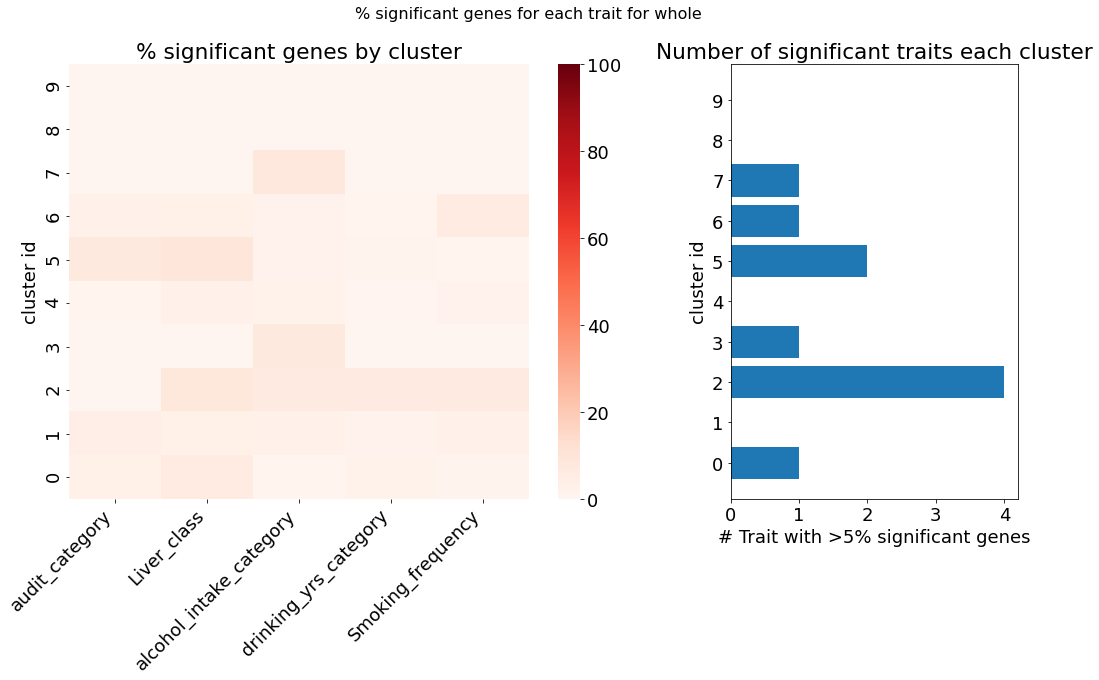

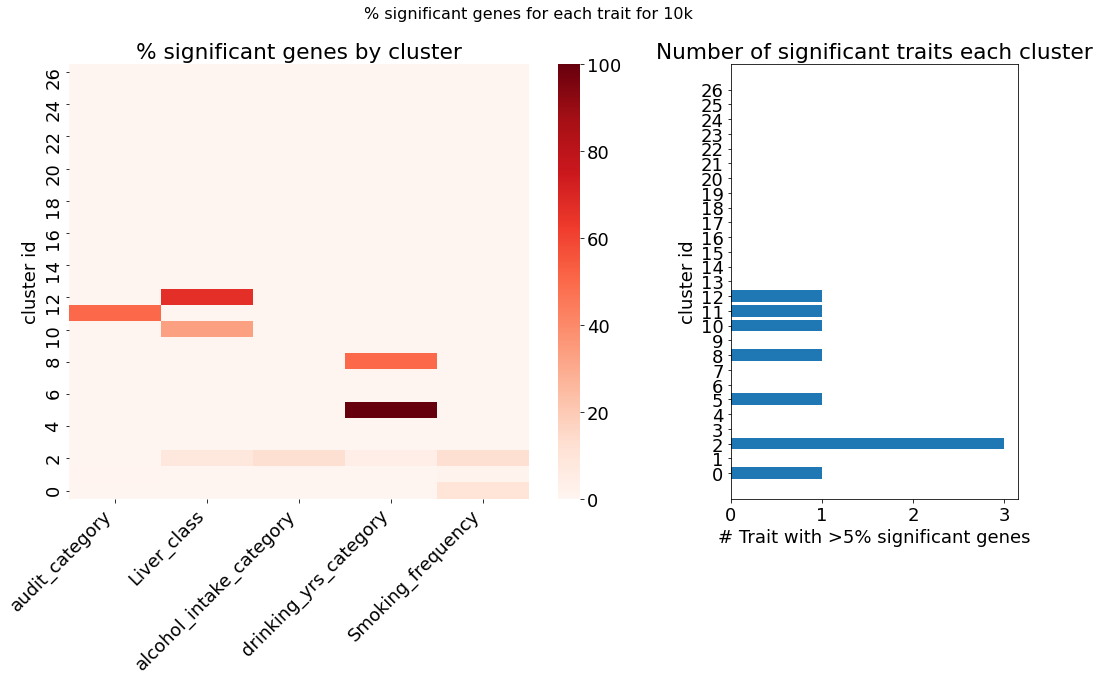

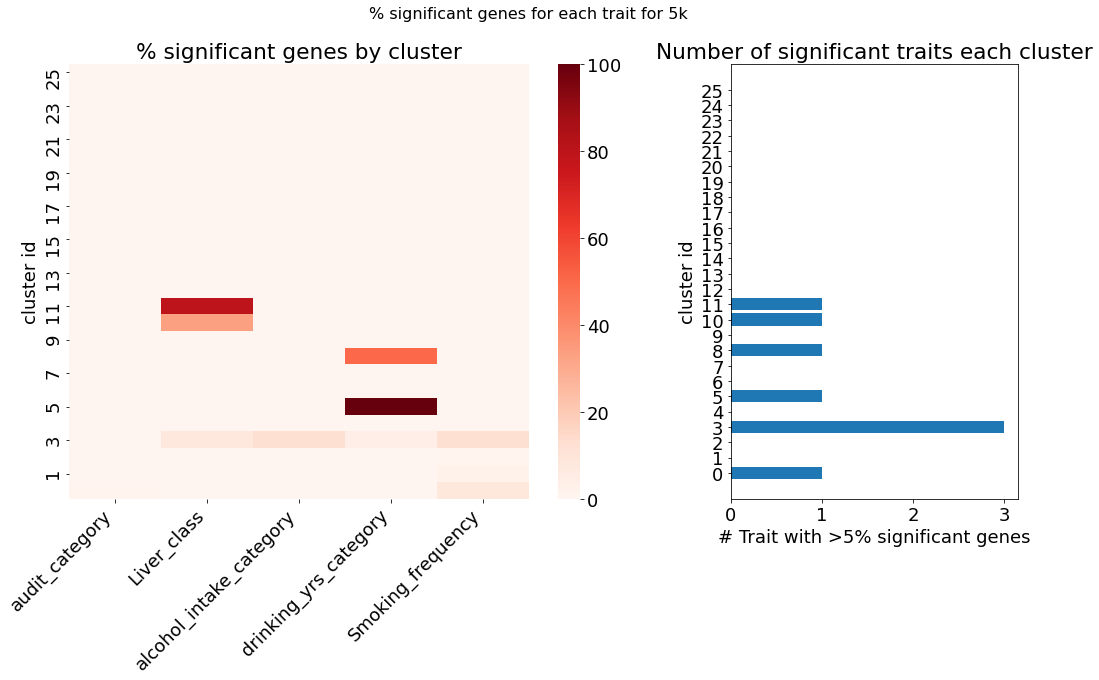

In [173]:
subset_names = ['whole','10k','5k']
for i, cluster_df in enumerate([comm_df1,subset_communities[0], subset_communities[1]]):
    plot_sig_perc(cluster_df, 'louvain_label', subset_names[i])

### Evaluation 3.2c: compare whole network and subnetwork communities by cluster and trait correlation

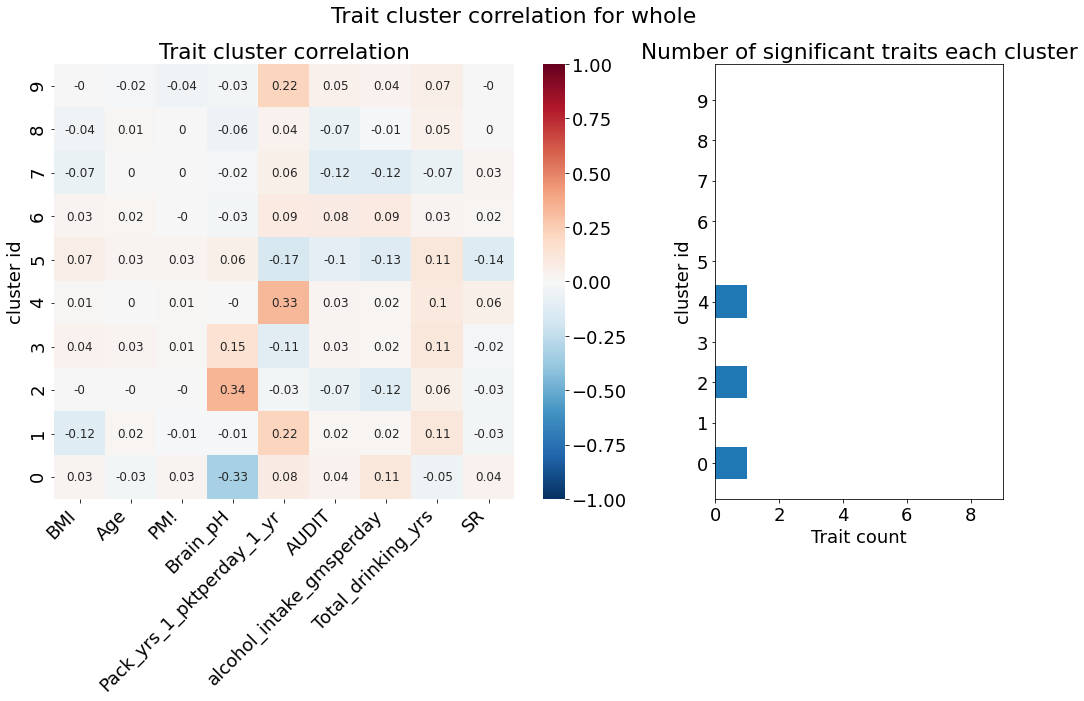

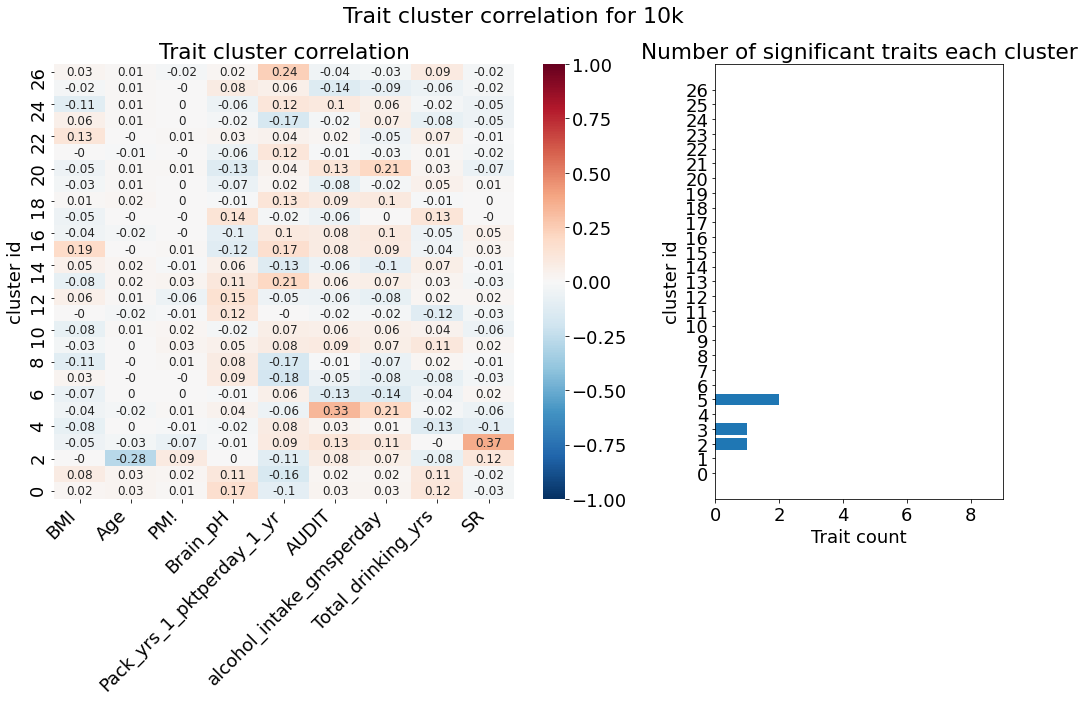

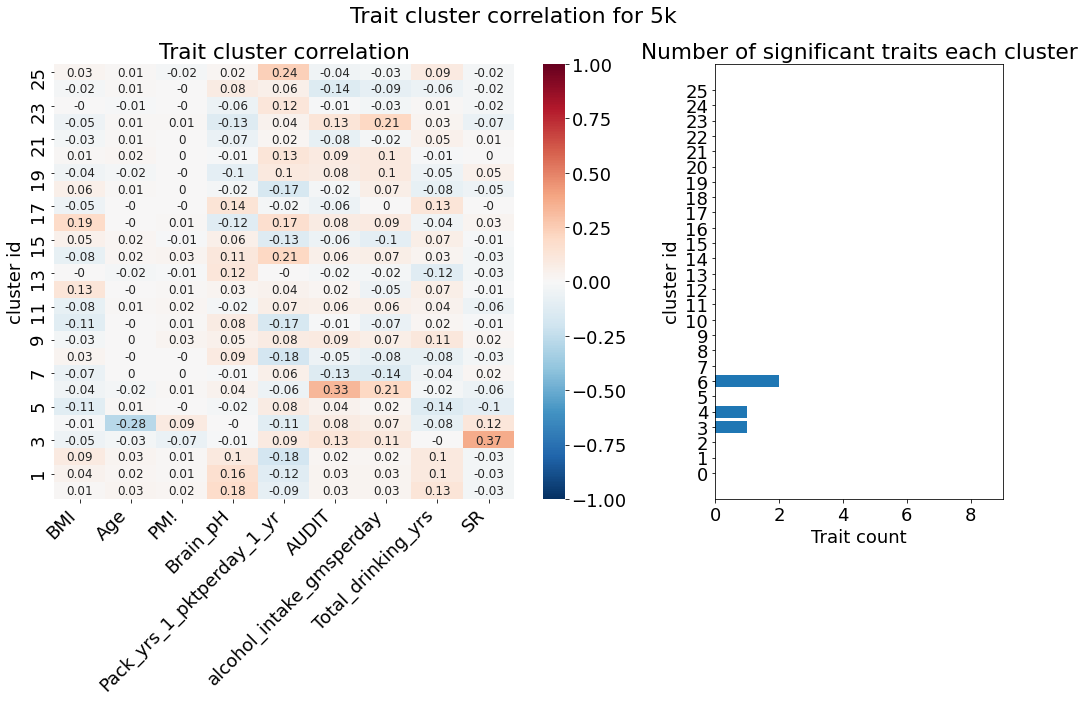

In [153]:
for i, cluster_df in enumerate([comm_df1,subset_communities[0], subset_communities[1]]):
    cluster_phenotype_corr(cluster_df, 'louvain_label', subset_names[i])